In [12]:
import matplotlib.pyplot as plt


In [13]:
import utils
import importlib
importlib.reload(utils)

from utils import *

In [169]:
p = get_random_point(frame)
c = get_random_courier(frame)
o = get_random_order(frame)
a = ActiveRoute(c, o)

In [170]:
couriers = [get_random_courier(frame) for _ in range(10)]
orders = [get_random_order(frame) for _ in range(10)]
acroutes = [ActiveRoute(c, o) for c, o in zip(couriers, orders)]

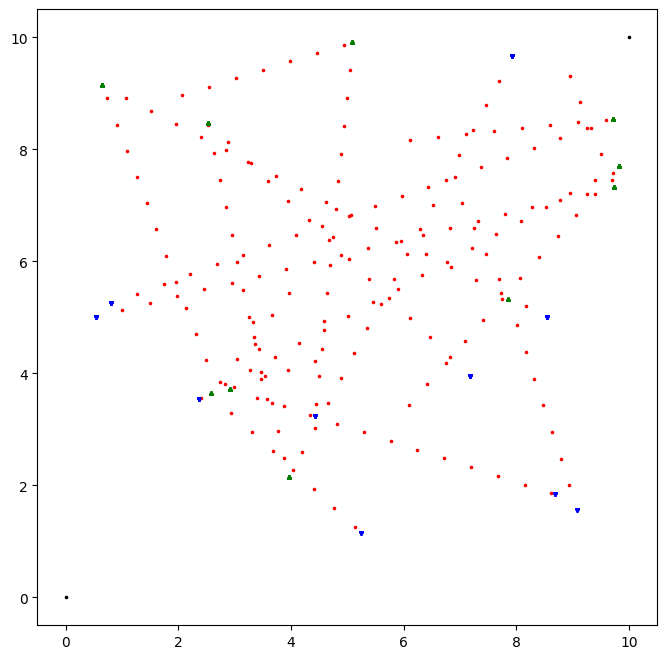

In [171]:

fig, ax = plt.subplots()
frame = (Point(0, 0), Point(10, 10))
frame[0].plot(ax, color='black')
frame[1].plot(ax, color='black')
fig.set_figheight(8)
fig.set_figwidth(8)

for iter in range(100):
    for ar in acroutes:
        if ar.is_active:
            ar.plot(ax)
            ar.next(0.5)

Run tests

In [124]:
%matplotlib inline
import matplotlib.pyplot as plt

import utils
import dispatch
import simulator
import importlib
importlib.reload(utils)
importlib.reload(dispatch.dispatch)
importlib.reload(dispatch.scorings)
importlib.reload(simulator.base_simulator)
importlib.reload(simulator.visualization)

from utils import *
from dispatch.dispatch import Dispatch
from simulator.base_simulator import BaseSimulator
from simulator.visualization import Visualizer

ActiveRoute: [Courier;  id: 374774009; pos: (9.028347550610468, 8.759111467544765); Order; id: 755925454; from: (9.178519091698934, 8.403199489063296); to: (9.111232698708008, 3.2156289120215718)]
ActiveRoute: [Courier;  id: 375490923; pos: (1.978355331774625, 7.606103716496859); Order; id: 976893602; from: (1.5805252304301787, 7.33894553450723); to: (5.919213109558666, 8.047547649137236)]


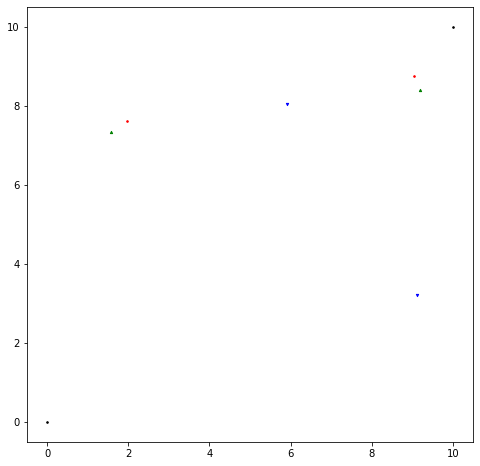

In [125]:
dsp = Dispatch()
sim = BaseSimulator(dsp, 0.1)

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(8)
    
sim.corner_bounds[0].plot(ax, color='black')
sim.corner_bounds[1].plot(ax, color='black')

all_metrics = []
for i in range(1):
    metrics = sim.GetMetrics()
    all_metrics.append(metrics)
    sim.Next()
    for ar in sim.active_routes:
        ar.plot(ax)

In [126]:
sim.active_routes

[ActiveRoute: [Courier;  id: 374774009; pos: (9.028347550610468, 8.759111467544765); Order; id: 755925454; from: (9.178519091698934, 8.403199489063296); to: (9.111232698708008, 3.2156289120215718)],
 ActiveRoute: [Courier;  id: 375490923; pos: (1.978355331774625, 7.606103716496859); Order; id: 976893602; from: (1.5805252304301787, 7.33894553450723); to: (5.919213109558666, 8.047547649137236)]]

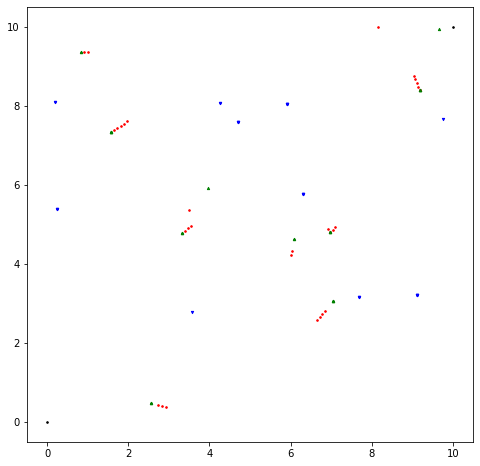

In [130]:
sim.Next()
for ar in sim.active_routes:
    ar.plot(ax)
fig

In [39]:
all_metrics = []
for i in range(500):
    metrics = sim.GetMetrics()
    all_metrics.append(metrics)
    sim.Next()

c:\Users\Danill\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\Users\Danill\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


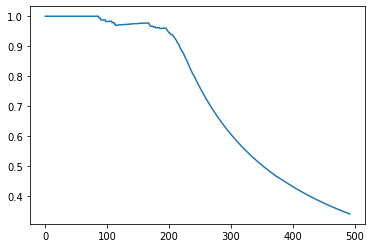

In [40]:
plt.plot([m['completed_orders'] / m['finished_orders'] for m in all_metrics if m['finished_orders'] != 0])

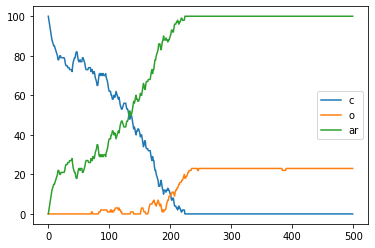

In [41]:
plt.plot([m['current_free_couriers'] for m in all_metrics], label='c')
plt.plot([m['current_free_orders'] for m in all_metrics], label='o')
plt.plot([m['current_active_routes'] for m in all_metrics], label='ar')
plt.legend()

In [42]:
sim.GetMetrics()

{'iter': 500,
 'completed_orders': 299,
 'finished_orders': 877,
 'current_free_couriers': 0,
 'current_free_orders': 23,
 'current_active_routes': 100}

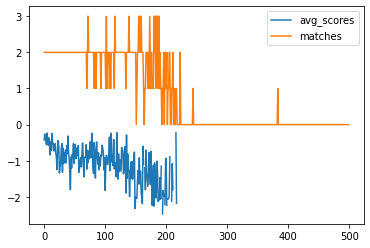

In [45]:
plt.plot(sim.dispatch.statistics['avg_scores'], label='avg_scores')
plt.plot(sim.dispatch.statistics['num_assignments'], label='matches')
plt.legend()

In [54]:
ar = sim.active_routes[0]

In [55]:
ar

ActiveRoute: [Courier;  id: 839534403; pos: (3.2624422838985643, 1.312816732563598); Order; id: 77125904; from: (2.763138463017223, 1.3391927529854386); to: (9.39322595677366, 0.98895444953078)]